## 로지스틱 회귀(Logistic Regression)

- 시그모이드(sigmoid) 함수 그래프

In [4]:
import numpy as np
import matplotlib.pyplot as plt

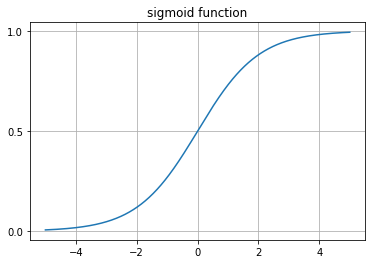

In [6]:
xs = np.linspace(-5,5,1001)
ys = 1. / (1+np.exp(-xs))
plt.plot(xs,ys)
plt.title('sigmoid function')
plt.yticks([0,0.5,1])
plt.grid()
plt.show()

- 로지스틱 회귀

In [7]:
from sklearn.datasets import load_wine
wine = load_wine()

In [9]:
import pandas as pd
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
df.shape

(178, 13)

In [12]:
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(
    wine_std, wine.target, stratify=wine.target, test_size=0.2, random_state=2021
)


In [14]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2021)
lrc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2021,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [17]:
lrc.fit(X_train, y_train)

LogisticRegression(random_state=2021)

In [19]:
lrc.coef_                   #계수, coefficient, weights

array([[ 0.71296209,  0.11937814,  0.49074555, -0.85638421,  0.0254727 ,
         0.27478795,  0.59633518, -0.09873108,  0.0480113 ,  0.02355104,
         0.10446928,  0.58671407,  0.9916089 ],
       [-1.07369152, -0.42995366, -0.82630169,  0.62763848, -0.26468805,
         0.05631598,  0.19456714,  0.10416357,  0.46040048, -0.81356693,
         0.61311528,  0.08761593, -1.05695939],
       [ 0.36072944,  0.31057552,  0.33555615,  0.22874573,  0.23921535,
        -0.33110393, -0.79090232, -0.0054325 , -0.50841177,  0.79001589,
        -0.71758457, -0.67433   ,  0.06535049]])

In [21]:
lrc.intercept_              #절편, bias

array([ 0.40705095,  0.78954267, -1.19659363])

In [24]:
lrc.predict_proba(X_test[:5])

array([[6.15802030e-02, 9.06571506e-01, 3.18482912e-02],
       [1.91005604e-03, 1.76574269e-04, 9.97913370e-01],
       [2.06036549e-02, 9.78616469e-01, 7.79876250e-04],
       [9.99843499e-01, 1.07738488e-04, 4.87620780e-05],
       [2.27684331e-02, 9.76302697e-01, 9.28869729e-04]])

In [25]:
lrc.predict(X_test[:5])

array([1, 2, 1, 0, 1])

In [26]:
lrc.score(X_test,y_test)

0.9444444444444444